teg-4


C:\Users\rebec\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:258: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)


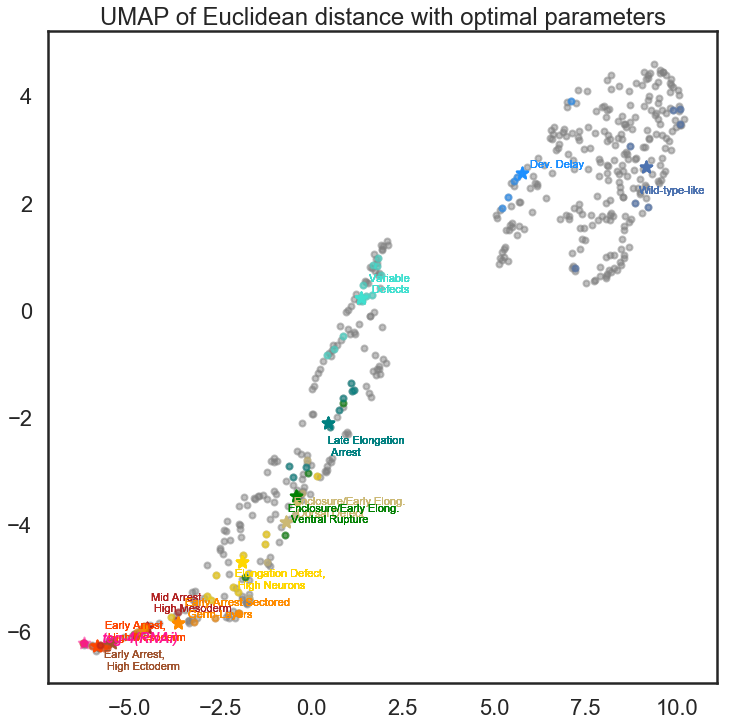

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import umap
import pandas as pd

all_params= False  #if false, runs optimal params dataset
dist = False  #runs UMAP on Euclidean dist. array
pad = True  #runs UMAP on PAD array
run_query = True


for i in range(1,2):
    if run_query:
        query = i
        gene_list = pd.read_csv('Z:/Gene_lists/gene_key.csv', delimiter=',',encoding='latin-1')
        gene_list = pd.DataFrame(gene_list)
        gene_list = np.array(gene_list)
        gene_list_b = list(gene_list)
        row = gene_list[np.where(gene_list[:,0]=='EMB_P{n:04}'.format(n=query))]
        row_list = list(row)
        common_name = row_list[0][2]
        print(common_name)

    sns.set(style='white', context='poster', rc={'figure.figsize':(14,10)})
    np.random.seed(71076)
    # np.random.seed(92507)

    rnaiList = [i for i in range(1,504)] # a list of EMBD numbers to generate RNAi objects from
    labels = [str(x) for x in rnaiList]



    # print(labels)
    if dist:
        if all_params:
            data = np.load('Z:/Automated_analysis/UMAP/Dist_Matrix_042122_allParams.npy')
        else:
            data = np.load('Z:/Automated_analysis/UMAP/Dist_Matrix_042122_optParams.npy')
    elif pad:
        if all_params:
            data = np.load('Z:/Automated_analysis/UMAP/PAD_Matrix_042122_allParams.npy')
        else:
            data = np.load('Z:/Automated_analysis/UMAP/PAD_Matrix_042122_optParams.npy')



    # data = np.load('Z:/Automated_analysis/UMAP/PAD_Matrix_042122_test3.npy')
    # data = np.load('Z:/Automated_analysis/UMAP/PAD_Matrix_042122.npy')

    groupColors = groupColors = ['sienna', 'orangered', 'firebrick', 'darkorange', 'gold', 'y', 'green', 'turquoise', 'teal',
                       'dodgerblue', 'b']
    plot_labels = ['Early Arrest, \n High Ectoderm', 'Early Arrest, \n High Mesoderm',
                       'Mid Arrest, \n High Mesoderm',
                       'Early Arrest Sectored  \n Germ-Layers', 'Elongation Defect,  \n High Neurons',
                       'Enclosure/Early Elong.  \n Dorsal Defect', 'Enclosure/Early Elong. \n Ventral Rupture',
                       'Variable \n Defects', 'Late Elongation \n Arrest', 'Dev. Delay', 'Wild-type-like']
    # groupLists = [[1,2], [3,4], [18], [5], #test list-- shorter than full dataset
    #                 [6], [7,8,9], [10],
    #                 [11],
    #                 [12, 13, 14], [15],
    #                 [16]] 
    # groupLists = [[21], [31, 32], [64,77],[63, 19],
    #                 [45], [9, 45, 52, 38], [95, 4, 57, 5],
    #                 [26],
    #                 [10, 15, 18, 28], [98, 91],
    #                 [72]]#use this set to test out without having to wait for full dataset

    groupLists = [[21, 364, 408, 130], [417, 64, 115, 281, 77], [77, 63, 19, 501],
                      [264, 386, 31, 32, 255, 388, 422, 118, 359],
                      [181, 182, 357, 184, 185, 154, 363, 117, 45, 447, 108], [9, 398, 435, 45, 52, 38],
                      [95, 4, 57, 5, 277],
                      [26, 453, 235, 327, 489, 379, 420, 225, 289, 261, 350],
                      [10, 15, 217, 18, 28, 439, 177, 291, 209], [110, 142, 98, 101, 186],
                      [383, 495, 498, 414, 375, 396, 321]]

    if run_query:
        query = [[query]]
        groupLists += query  # adds the query onto the last position in the list
        groupLabels = ['eCFS_R',  'eMEX', 'lMEX', 'sect rupt', 'hiNeur', 'dorsBend', 'rupture', 'gMix', '2xCrunch', 'dev delay', 'wt', 'query']
        groupColors = ['sienna',  'orangered','firebrick','darkorange' ,'gold', 'y', 'green', 'turquoise', 'teal', 'dodgerblue', 'b', 'deeppink']
        plot_labels = ['Early Arrest, \n High Ectoderm', 'Early Arrest, \n High Mesoderm', 'Mid Arrest, \n High Mesoderm',
                   'Early Arrest Sectored  \n Germ-Layers', 'Elongation Defect,  \n High Neurons',
                  'Enclosure/Early Elong.  \n Dorsal Defect', 'Enclosure/Early Elong. \n Ventral Rupture',
                  'Variable \n Defects', 'Late Elongation \n Arrest', 'Dev. Delay', 'Wild-type-like', 'Query']

    fit = umap.UMAP()
    points = fit.fit_transform(data)

    # print(points)
    # print(labels)
    fig = plt.figure(figsize=(12,12))
    for point in points:
        plt.scatter(point[0], point[1], color="grey", marker=".", alpha=0.5)

    for g in range(len(groupLists)):
        man_group_list = groupLists[g] #individual manual group
        lab = plot_labels[g]
        inds1= [] # this will be populated with the index position for each member of the man group within the array
        for p in man_group_list:
            inds1.append(labels.index(str(p)))
    #     print(inds1)

        for ind in inds1:
    #         print(points[ind])
            plt.scatter(points[ind][0], points[ind][1], color=groupColors[g], marker=".",
                            alpha=0.5) #plots the individual members of a group in a specific color
            plt.scatter(np.mean(points[inds1], axis=0)[0], np.mean(points[inds1], axis=0)[1], label=lab, marker="*",
                            alpha=0.5, color=groupColors[g])
            if lab=='Query':
                query_label = '{n}(RNAi)'.format(n=common_name)
    #             query_label = 'EMBD{n:04}(RNAi)'.format(n=query[0][0])
                plt.text(np.mean(points[inds1]+0.5, axis=0)[0], np.mean(points[inds1], axis=0)[1], query_label,
                         color=groupColors[g], size=14, style = 'italic', weight='bold')
            elif lab=='Late Elongation \n Arrest':
                plt.text(np.mean(points[inds1], axis=0)[0], np.mean(points[inds1]-0.6, axis=0)[1], lab,
                         color=groupColors[g], size=11)
            elif lab=='Mid Arrest, \n High Mesoderm':
                plt.text(np.mean(points[inds1], axis=0)[0]+0.1, np.mean(points[inds1]+0.3, axis=0)[1], lab,
                         color=groupColors[g], size=11)
            elif (g % 2)==0:
                plt.text(np.mean(points[inds1]-0.2, axis=0)[0], np.mean(points[inds1]-0.5, axis=0)[1], lab,
                         color=groupColors[g], size=11)
            else:
                plt.text(np.mean(points[inds1]+0.2, axis=0)[0], np.mean(points[inds1]+0.1, axis=0)[1], lab,
                         color=groupColors[g], size=11)
    #     print('end')
    # plt.legend()
    if all_params:
        if dist:
            plt.title('UMAP of Euclidean distance with ALL parameters')
            plt.savefig('Z:/Automated_analysis/UMAP/UMAP_EMBD_042222_Dist_ALL.svg')
        elif pad:
            plt.title('UMAP of PAD with ALL parameters')
            plt.savefig('Z:/Automated_analysis/UMAP/UMAP_EMBD_042222_PAD_ALL.svg')
    else:
        if dist:
            plt.title('UMAP of Euclidean distance with optimal parameters')
            plt.savefig('Z:/Automated_analysis/UMAP/UMAP_EMBD_042222_Dist_optv2.svg')
        elif pad:
            plt.title('UMAP of PAD with optimal parameters')
            plt.savefig('Z:/Automated_analysis/UMAP/UMAP_optparams_byRNAi/UMAP_EMBD_042222_PAD_optv2_EMBD{n:04}.svg'.format(n=query[0][0]))
    plt.close()

    #     if lab == 'Query':
    #         lab = 'EMBD_'.format(query)
    #         r = RNAiClass(query[0][0])
    #         query_name = getGeneCommonName(query[0][0])
    #         lab = '{}(RNAi)\n {}'.format(query_name, r.label)
    #         plt.scatter(points.iloc[inds1].median()[0], points.iloc[inds1].median()[1], label=lab, marker="*", s=fig.markerSize*20,           alpha=0.5, color=groupColors[g])
    #         plt.text(np.mean(points[inds1], axis=0)[0], np.mean(points[inds1], axis=0)[1], lab,
    #              color='m', size=11, style='italic')

#     plt.show()

In [3]:
print("hello")

hello


In [10]:
# data = np.load('Z:/Automated_analysis/UMAP/PAD_Matrix_042122_optParams.npy')
data = np.load('Z:/Automated_analysis/UMAP/Dist_Matrix_042122_optParams.npy')
df = pd.DataFrame(data)
print(df.head(50))

          0          1          2          3          4          5    \
0    0.000000  27.121795  28.994234  26.983009  30.067067  26.397421   
1   27.121795   0.000000   8.325905   9.330980   9.852644   8.083519   
2   28.994234   8.325905   0.000000   6.680406   8.363580   8.376426   
3   26.983009   9.330980   6.680406   0.000000   7.673450   6.710516   
4   30.067067   9.852644   8.363580   7.673450   0.000000   7.691198   
5   26.397421   8.083519   8.376426   6.710516   7.691198   0.000000   
6   28.117073   7.387006   5.836905   5.649488   5.705559   7.312087   
7   28.503353   8.303336   3.681358   6.111182   7.674433   8.026572   
8   27.644041   9.008810   7.531335   5.798894   6.341208   5.567591   
9   27.248565   7.570062   6.719525   5.422895   7.289195   7.588112   
10  29.378959   8.555699   3.123227   6.347073   7.880948   8.019578   
11  28.283268   7.857199   3.165278   6.012321   7.664976   7.856928   
12  28.417928  10.288066   9.758969   9.909725  11.757082   8.94